In [18]:
!pip install openai
!pip install -q gradio

In [37]:
import os
import requests

# Create the 'images' directory if it doesn't exist
os.makedirs('images', exist_ok=True)

# List of image URLs
image_urls = [
    'https://github.com/gradio-app/gradio/raw/main/demo/image_mod/images/cheetah1.jpg',
    'https://github.com/gradio-app/gradio/raw/main/demo/image_mod/images/lion.jpg'
]

# Download each image and save it with a sequential name
for i, url in enumerate(image_urls, start=1):
    response = requests.get(url)
    if response.status_code == 200:
        filename = f'images/{i}.jpg'
        with open(filename, 'wb') as file:
            file.write(response.content)

In [20]:
import openai
from getpass import getpass
openai.api_key = getpass("Please enter your OpenAI API key:")

In [21]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

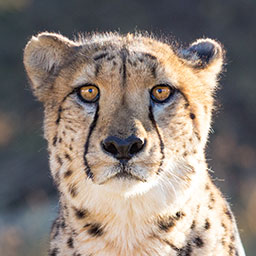

Focused, intense, sharp, clear, detailed, natural, feline, spotted,
alert, wild, piercing.  If I were in this picture, feeling
anthropomorphic, I might feel observant, cautious, intrigued,
majestic, or predatory.


In [42]:
from IPython.display import display, Image
import textwrap

x = 1
image_path = 'images/'+str(x)+'.jpg'



encoded_image = encode_image(image_path)

result = openai.chat.completions.create(
    model = "gpt-4-vision-preview",
    messages=[
        {
            "role":"user",
            "content": [
                {"type": "text",
                 "text": "Explain what is happening in this image. Use only adjectives. Explain how you would feel if you were in this picture."},
                 {"type": "image_url",
                  "image_url": f"data:image/jpeg;base64,{encoded_image}"}
            ]
        },
    ],
    max_tokens=300
)

display(Image(image_path))
print(textwrap.fill(result.choices[0].message.content, width=70))